# Ejercicio de machine learning de clasificación, modelo supervisado

Este notebook consta de las siguientes partes:

- Preparación del dataset igual que archivo MPG-EDA

- CASO DE CLASIFICACION ( predicción sobre la variable target "origin", si el automóvil es de Japan o USA ).
      
      * Separación dataset en training y test para clasificación
      * Modelos de clasificación
      * Métricas modelo clasificación
      
   


Preparación del dataset igual que archivo MPG-EDA

In [1]:
import numpy as np
import pandas as pd 
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url ="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv"
df = pd.read_csv(url)

In [3]:
df.origin= df.origin.replace({"europe": "japan"
                              })

In [4]:
df.drop(["model_year"],axis=1,inplace=True)


In [5]:
df.drop_duplicates(inplace=True)

In [6]:
mean = df["horsepower"].mean()
df["horsepower"].replace(np.NaN,mean, inplace=True)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,name
0,18.0,8,307.0,130.000000,3504,12.0,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.000000,3693,11.5,usa,buick skylark 320
2,18.0,8,318.0,150.000000,3436,11.0,usa,plymouth satellite
3,16.0,8,304.0,150.000000,3433,12.0,usa,amc rebel sst
4,17.0,8,302.0,140.000000,3449,10.5,usa,ford torino
5,15.0,8,429.0,198.000000,4341,10.0,usa,ford galaxie 500
6,14.0,8,454.0,220.000000,4354,9.0,usa,chevrolet impala
7,14.0,8,440.0,215.000000,4312,8.5,usa,plymouth fury iii
8,14.0,8,455.0,225.000000,4425,10.0,usa,pontiac catalina
9,15.0,8,390.0,190.000000,3850,8.5,usa,amc ambassador dpl


================================================================================================================

CASO DE CLASIFICACION

En este caso, la varaible target es "origin" y, por tanto, categórica

In [7]:
# hacemos una copia del dataset, para poder usarla tal cual está en el futuro, si hace falta. Usaremos Datasetclasif para el
# modelo clasificador.
Datasetclasif=df.copy()

In [8]:
# transformamos la target "origin" a binaria con valor '0 y 1', donde 0 es japan y 1, USA.
from sklearn.preprocessing import LabelBinarizer
label_Binarizer = LabelBinarizer()

label_Binarizer.fit(Datasetclasif["origin"])

Datasetclasif["origin"] = label_Binarizer.transform(Datasetclasif["origin"])

# comprobamos que ha funcionado
Datasetclasif

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,name
0,18.0,8,307.0,130.000000,3504,12.0,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.000000,3693,11.5,1,buick skylark 320
2,18.0,8,318.0,150.000000,3436,11.0,1,plymouth satellite
3,16.0,8,304.0,150.000000,3433,12.0,1,amc rebel sst
4,17.0,8,302.0,140.000000,3449,10.5,1,ford torino
5,15.0,8,429.0,198.000000,4341,10.0,1,ford galaxie 500
6,14.0,8,454.0,220.000000,4354,9.0,1,chevrolet impala
7,14.0,8,440.0,215.000000,4312,8.5,1,plymouth fury iii
8,14.0,8,455.0,225.000000,4425,10.0,1,pontiac catalina
9,15.0,8,390.0,190.000000,3850,8.5,1,amc ambassador dpl


In [9]:
# separamos las features de la target
columnas=['mpg','cylinders', 'displacement',"horsepower","weight","acceleration"]

In [10]:
# checked para ver que sólo aparecen las features (target "origin" no aparece)
Datasetclasif[columnas].head()

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130.0,3504,12.0
1,15.0,8,350.0,165.0,3693,11.5
2,18.0,8,318.0,150.0,3436,11.0
3,16.0,8,304.0,150.0,3433,12.0
4,17.0,8,302.0,140.0,3449,10.5


Separación dataset en training y test para clasificación

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# dejaremos el 80% de las muestras para train y el 20% para test.
train,test=train_test_split(Datasetclasif,train_size=0.8, test_size=0.2, random_state=42)

In [13]:
train.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,name
263,17.7,6,231.0,165.0,3445,13.4,1,buick regal sport coupe (turbo)
114,26.0,4,98.0,90.0,2265,15.5,0,fiat 124 sport coupe
177,23.0,4,115.0,95.0,2694,15.0,0,audi 100ls
64,15.0,8,318.0,150.0,4135,13.5,1,plymouth fury iii
246,32.8,4,78.0,52.0,1985,19.4,0,mazda glc deluxe


In [14]:
test.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,name
115,15.0,8,350.0,145.0,4082,13.0,1,chevrolet monte carlo s
279,29.5,4,98.0,68.0,2135,16.6,0,honda accord lx
238,33.5,4,98.0,83.0,2075,15.9,1,dodge colt m/m
58,25.0,4,97.5,80.0,2126,17.0,1,dodge colt hardtop
73,13.0,8,307.0,130.0,4098,14.0,1,chevrolet chevelle concours (sw)


In [17]:
features=['mpg',"cylinders",'displacement',"horsepower","weight", "acceleration"]

In [18]:
# división de train y test, y subdivisión con features por un lado y la target por otra
X_train=train[features]
y_train=train["origin"]

X_test=test[features]
y_test=test["origin"]



In [19]:
# reset del label porque ha quedado desordenado
X_train.reset_index(inplace=True,drop=True)
X_test.reset_index(inplace=True,drop=True)
y_train.reset_index(inplace=True,drop=True)
y_test.reset_index(inplace=True,drop=True)

In [20]:
# checked features de train
X_train

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,17.7,6,231.0,165.0,3445,13.4
1,26.0,4,98.0,90.0,2265,15.5
2,23.0,4,115.0,95.0,2694,15.0
3,15.0,8,318.0,150.0,4135,13.5
4,32.8,4,78.0,52.0,1985,19.4
5,13.0,8,440.0,215.0,4735,11.0
6,44.0,4,97.0,52.0,2130,24.6
7,20.0,6,198.0,95.0,3102,16.5
8,34.0,4,112.0,88.0,2395,18.0
9,24.5,4,98.0,60.0,2164,22.1


In [21]:
# checked target de train
y_train

0      1
1      0
2      0
3      1
4      0
5      1
6      0
7      1
8      1
9      1
10     0
11     0
12     0
13     0
14     1
15     1
16     1
17     0
18     0
19     1
20     1
21     1
22     0
23     1
24     0
25     1
26     0
27     0
28     0
29     0
      ..
287    0
288    1
289    1
290    0
291    1
292    1
293    0
294    1
295    0
296    1
297    1
298    0
299    0
300    0
301    1
302    0
303    1
304    1
305    1
306    0
307    1
308    0
309    1
310    0
311    1
312    1
313    1
314    1
315    0
316    1
Name: origin, Length: 317, dtype: int32

In [22]:
# checked features de test
X_test

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,15.0,8,350.0,145.000000,4082,13.0
1,29.5,4,98.0,68.000000,2135,16.6
2,33.5,4,98.0,83.000000,2075,15.9
3,25.0,4,97.5,80.000000,2126,17.0
4,13.0,8,307.0,130.000000,4098,14.0
5,33.7,4,107.0,75.000000,2210,14.4
6,13.0,8,302.0,140.000000,4294,16.0
7,16.0,8,318.0,150.000000,4498,14.5
8,15.0,6,250.0,72.000000,3432,21.0
9,28.1,4,141.0,80.000000,3230,20.4


In [23]:
# checked target de test
y_test

0     1
1     0
2     1
3     1
4     1
5     0
6     1
7     1
8     1
9     0
10    1
11    1
12    0
13    0
14    1
15    0
16    1
17    0
18    1
19    0
20    1
21    1
22    0
23    1
24    1
25    0
26    0
27    1
28    1
29    1
     ..
50    0
51    1
52    1
53    1
54    0
55    1
56    0
57    1
58    1
59    1
60    0
61    1
62    1
63    0
64    1
65    1
66    1
67    1
68    0
69    0
70    1
71    1
72    0
73    0
74    1
75    1
76    1
77    1
78    1
79    0
Name: origin, Length: 80, dtype: int32

Puesto que vamos a optar por modelos usando GridsearchCV no hemos separando el dataset en traning , test y validación, ya que 
GridsearchCV lleva incorporada la cross validation.

Modelos de clasificación:

Vamos a comenzar por los modelos que no necesitan estandarizar sus features (Árbol de decisión, Random Forest, Gradient Boosting, Naïves Bayes) y luego, para los modelos que necesitan ser estandarizadas sus features, usaremos un pipeline 
(K neighbours, regresión logística, SVM, red neuronal )

In [24]:
# ver cómo está de equilibrado el número de vinos japan (0) y USA (1)
Datasetclasif['origin'].value_counts()

1    249
0    148
Name: origin, dtype: int64

Al ver que de automóviles USA hay el 60% del dataset, nos puede hacer pensar que el dataset está un poco desbalanceado y habrá que 
mirar bien las métricas; aparte de la accuracy, daremos importancia al resto ( matriz confusión, precision, recall, f1 score, curva
roc)



Métricas de clasificación

. Recall: los adecuadamente predichos como 1 (Tp) / todos los que son 1 en realidad (Tp)+ (Fn), es decir,
el porcentaje de 1 que soy capaz de captar. (Sensibilidad  del modelo).

. Precision: los adecuadamente predichos como 1(Tp)/ todos los predichos como 1 (Tp)+(Fp)

. f1 Score: combina	en	una	sola métrica la precisión y el recall. Metrica muy buena para fijarse con datasets desbalanceados

. Accuracy : (exactitud), porcentaje de observaciones clasificadas correctamente

. Matriz de confusión es una tablita que se	utiliza	normalmente	para ver qué tal lo ha hecho un clasificador

. Curva ROC La	curva	ROC	(Receiver Operating Characteristic)	es un gráfico muy útil para	visualizar el rendimiento de	
un	clasificador binario. Tiene	los	siguientes	ejes:	
• El	eje	de	abscisas	es	el	False	Positive	Rate	(FPR)	
• El	eje	de	ordenadas	es	el	True	Positive	Rate	(TPR)	

Interesa que la curva ROC se despegue lo más rápidamente posible hacia arriba de la diagonal del gráfico (llamado Random guess, que es la predicción 0-1 sin modelo, haciéndolo a boleo). 
Su interpretación es que para conseguir un porcentaje de verdaderos positivos tengo que asumir un número X de falsos positivos

Interesan que sean cuanto más altas métricas, mejor

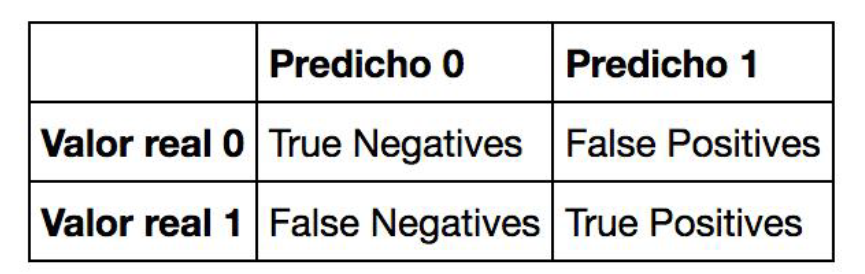

In [25]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [26]:
def metricas_todas(modelo,X,y):
    recall=recall_score(y_true=y,y_pred=modelo.predict(X))
    precision=precision_score(y_true=y,y_pred=modelo.predict(X))
    f1 =f1_score(y_true=y,y_pred=modelo.predict(X))
    accuracy=modelo.score(X,y)
    area=roc_auc_score(y_true=y,y_score=modelo.predict(X))
    return {"recall":recall,"precision":precision,"f1_score":f1,"accuracy":accuracy,"Area_roc":area}      
        
        
def draw_roc(model, X, y, titulo="Roc curve", figsize=(8, 8)):
    """
    Function to plot the ROC Curve
    ARgs: A machine learning model, a dataframe with the independent variables (X), a series or colection with the target
    variable (y), the graph title and figsize
    Returns:  A plot with the roc curve


    """

    y_test_proba = model.predict_proba(X)[:, 1]
    fpr, tpr, umbrales = roc_curve(y_true=y,
                                   y_score=y_test_proba)  
    plt.figure(figsize=figsize)
    plt.plot([0, 1], [0, 1], "r--")
    plt.plot(fpr, tpr, "b")
    plt.fill_between(fpr, tpr, alpha=0.4, color="yellow")
   
    plt.show()




In [27]:
# lo vamos a necesitar para todos los modelos
from sklearn.model_selection import GridSearchCV

- ARBOL DE DECISION

arbol = DecisionTreeClassifier() tipo de modelo que vamos a utilizar

grid_arbol: aquí vamos eligiendo los hiperparámetros que usaremos en el gridsearch. Profundidad del árbol influye en el
overfitting, así que es importante que no sea muy profundo

CV: número de particiones que quiero hacer para la validación de la parte train. Eligimos un número impar mejor,7
verbose: cuánta información quiero que el proceso del entrenamiento vaya pintando a medida que se va ejecutando. Eligiremos 1
para todos los casos

n_jobs: utilizar toda la maquinaria del ordenador. Utilizaremos -1 en todos los casos

In [28]:
from sklearn.tree import DecisionTreeClassifier


arbol = DecisionTreeClassifier()
grid_arbol = {"max_depth":list(range(1,11)),"random_state":[42] }                             
                                
gs_arbolclasif = GridSearchCV(arbol,
                        grid_arbol,
                        cv=7,
                        verbose=1,
                        n_jobs=-1)

In [29]:
gs_arbolclasif.fit(X_train,y_train)

Fitting 7 folds for each of 10 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    3.4s finished


GridSearchCV(cv=7, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'random_state': [42]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [30]:
gs_arbolclasif.predict(X_test)

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0])

In [31]:
# .score calcula la accuracy en modelo clasificación 
gs_arbolclasif.score( X_test,y_test)

0.9

In [32]:
gs_arbolclasif.score(X=X_train,y=y_train)

0.9684542586750788

In [33]:
metricas_todas(gs_arbolclasif,X_test,y_test)

{'recall': 0.9,
 'precision': 0.9375,
 'f1_score': 0.9183673469387755,
 'accuracy': 0.9,
 'Area_roc': 0.9}

In [34]:
modelo=gs_arbolclasif
matriz=confusion_matrix(y_true=y_test,y_pred=modelo.predict(X_test))
print(matriz)

[[27  3]
 [ 5 45]]


CONCLUSION: Vemos que hay un poco de diferencia entre el resultado de train y de test. Sobreajusta un poco en el caso de train. Vamos a ver el resto de modelos y comparar. Las métricas, no obstante, son bastante altas.

- RANDOM FOREST

Se basa también en un modelo de árboles, esta vez muchos; es un caso especial de modelo bagging. Los parámetros más importantes son el número de árboles y la profundidad

In [35]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()

grid_random_forest = {"n_estimators": [150], "max_depth": [3,5,10,15,20] , "random_state": [42]}
                     
                      
gs_random_forestclasif = GridSearchCV(random_forest,
                                grid_random_forest,
                                cv=7,
                                verbose=1,
                                n_jobs=-1)
                               


C:\Users\Noemí\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [36]:
gs_random_forestclasif.fit(X_train,y_train)

Fitting 7 folds for each of 5 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    4.5s finished


GridSearchCV(cv=7, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [150], 'max_depth': [3, 5, 10, 15, 20], 'random_state': [42]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [37]:
gs_random_forestclasif.predict(X_test)

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0])

In [38]:
gs_random_forestclasif.score( X_test,y_test)

0.8375

In [39]:
gs_random_forestclasif.score(X=X_train,y=y_train)

1.0

In [40]:
metricas_todas(gs_random_forestclasif,X_test,y_test)

{'recall': 0.9,
 'precision': 0.8490566037735849,
 'f1_score': 0.8737864077669903,
 'accuracy': 0.8375,
 'Area_roc': 0.8166666666666667}

In [41]:
modelo=gs_random_forestclasif
matriz=confusion_matrix(y_true=y_test,y_pred=modelo.predict(X_test))
print(matriz)

[[22  8]
 [ 5 45]]


CONCLUSION: Vemos que el resultado en train y test es también muy dispar, sobreajusta totalmente en train.

- GRADIENT BOOSTING

El parametro más importante en el GB es el learning rate (también que la profundidad de los árboles sea baja)
A diferencia del Random Forest, aquí un número elevado de árboles sí puede dar sobreajuste
subsample: Para valores < 1.0, cada nuevo arbolito entrenará solo con el porcentaje del training set especificado;
puede ayudar a evitar la sobre-especialización de los árboles y por tanto bajar la variance de nuestro modelo.


In [42]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosting = GradientBoostingClassifier()

grid_gradient_boosting = {"loss": ["deviance"], "learning_rate": [0.01,0.05, 0.1, 0.5], "n_estimators": [20,50,100,200], 
                          "max_depth": [1,2,3,4,5],"subsample": [1.0, 0.8, 0.5], "random_state": [42] }

gs_gradient_boosting_clasif = GridSearchCV(gradient_boosting,
                                    grid_gradient_boosting,
                                    cv=7,
                                    verbose=1,
                                    n_jobs=-1)
                                    

In [43]:
gs_gradient_boosting_clasif.fit(X_train,y_train)

Fitting 7 folds for each of 240 candidates, totalling 1680 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 557 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 1557 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 1665 out of 1680 | elapsed:   21.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 1680 out of 1680 | elapsed:   21.8s finished


GridSearchCV(cv=7, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'loss': ['deviance'], 'learning_rate': [0.01, 0.05, 0.1, 0.5], 'n_estimators': [20, 50, 100, 200], 'max_depth': [1, 2, 3, 4, 5], 'subsample': [1.0, 0.8, 0.5], 'random_state': [42]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [44]:
gs_gradient_boosting_clasif.predict(X_test)

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0])

In [45]:
gs_gradient_boosting_clasif.score( X_test,y_test)

0.875

In [46]:
gs_gradient_boosting_clasif.score(X=X_train,y=y_train)

1.0

In [47]:
metricas_todas(gs_gradient_boosting_clasif,X_test,y_test)

{'recall': 0.88,
 'precision': 0.9166666666666666,
 'f1_score': 0.8979591836734694,
 'accuracy': 0.875,
 'Area_roc': 0.8733333333333333}

In [48]:
modelo=gs_gradient_boosting_clasif
matriz=confusion_matrix(y_true=y_test,y_pred=modelo.predict(X_test))
print(matriz)

[[26  4]
 [ 6 44]]


CONCLUSION: Por ahora el que mejor parece comportarse es el árbol de decisión, aquí hay también mucho sobreajuste.

- NAIVE BAYES


In [49]:
from sklearn.naive_bayes import GaussianNB
naive_bayes= GaussianNB()

gs_naive_bayes_clasif = GridSearchCV(naive_bayes,
                     {},  # No hay grid
                     cv=7,
                      verbose=1,
                     n_jobs=-1)
                  

In [50]:
gs_naive_bayes_clasif.fit(X_train,y_train)

Fitting 7 folds for each of 1 candidates, totalling 7 fits


[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    2.9s finished


GridSearchCV(cv=7, error_score='raise', estimator=GaussianNB(priors=None),
       fit_params=None, iid=True, n_jobs=-1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [51]:
gs_naive_bayes_clasif.predict(X_test)

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0])

In [52]:
gs_naive_bayes_clasif.score(X_test,y_test)

0.7625

In [53]:
gs_naive_bayes_clasif.score(X=X_train,y=y_train)

0.7981072555205048

In [54]:
metricas_todas(gs_naive_bayes_clasif,X_test,y_test)

{'recall': 0.68,
 'precision': 0.918918918918919,
 'f1_score': 0.7816091954022989,
 'accuracy': 0.7625,
 'Area_roc': 0.7900000000000001}

In [55]:
modelo=gs_naive_bayes_clasif
matriz=confusion_matrix(y_true=y_test,y_pred=modelo.predict(X_test))
print(matriz)

[[27  3]
 [16 34]]


Aquí vemos que es el modelo en el que el resultado de train y test son más parecidos, aunque son un poco bajos. el F1 score es el más bajo de los vistos hasta ahora y es una muy buena métrica para dataset desbalanceados como es el caso. Parece que el que mejor se comporta es el árbol de decisión.

- K NEIGHBORS

A partir de este modelo en adelante, como tiene en cuenta las distancias, tenemos que estandarizar las features y, para ello, vamos a usar un pipeline para unir dicha estandarización con el cálculo de su modelo predictivo

Número de vecinos siempre mejor impares
knn__weights función de la inversa de la distancia a cada vecino

In [56]:
# Común a los modelos que vamos a estandarizar
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [57]:
from sklearn.neighbors import KNeighborsClassifier


                        
neighbors = Pipeline(steps=[("scaler",StandardScaler()),
                            ("knn",KNeighborsClassifier())
                          ]
                   )
                                                          
grid_neighbors = {"knn__n_neighbors": [3,5,7,9,11], 
                  "knn__weights": ["uniform","distance"]   
                                                                                           
                  }                                                         
                  
gs_neighbors_clasif = GridSearchCV(neighbors,
                            grid_neighbors,
                            cv=7,
                            verbose=1,
                            n_jobs=-1)

In [58]:
gs_neighbors_clasif.fit(X_train,y_train)

Fitting 7 folds for each of 10 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  55 out of  70 | elapsed:    3.4s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    3.4s finished


GridSearchCV(cv=7, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'knn__n_neighbors': [3, 5, 7, 9, 11], 'knn__weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [59]:
gs_neighbors_clasif.predict(X_test)

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0])

In [60]:
gs_neighbors_clasif.score(X_test,y_test)

0.775

In [61]:
gs_neighbors_clasif.score(X=X_train,y=y_train)

0.8706624605678234

In [62]:
metricas_todas(gs_neighbors_clasif,X_test,y_test)

{'recall': 0.86,
 'precision': 0.7962962962962963,
 'f1_score': 0.826923076923077,
 'accuracy': 0.775,
 'Area_roc': 0.7466666666666666}

In [63]:
modelo=gs_neighbors_clasif
matriz=confusion_matrix(y_true=y_test,y_pred=modelo.predict(X_test))
print(matriz)

[[19 11]
 [ 7 43]]


CONCLUSION:también vemos unos resultados muy dispares entre train y test y la accuracy es una de las más bajas.


- REGRESION LOGISTICA


In [64]:
from sklearn.linear_model import LogisticRegression


logreg = Pipeline(steps=[("scaler",StandardScaler()),
                               ("logreg",LogisticRegression())] )

  

gs_logreg_clasif =     GridSearchCV(logreg,
                               {},  # No hay grid,
                               cv=7,
                               verbose=1,
                               n_jobs=-1)


In [65]:
gs_logreg_clasif.fit(X_train,y_train)

Fitting 7 folds for each of 1 candidates, totalling 7 fits


[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    3.1s finished


GridSearchCV(cv=7, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logreg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [66]:
gs_logreg_clasif.predict(X_test)

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0])

In [67]:
gs_logreg_clasif.score(X_test,y_test)

0.8375

In [68]:
gs_logreg_clasif.score(X=X_train,y=y_train)

0.8832807570977917

In [69]:
metricas_todas(gs_logreg_clasif,X_test,y_test)

{'recall': 0.84,
 'precision': 0.8936170212765957,
 'f1_score': 0.8659793814432989,
 'accuracy': 0.8375,
 'Area_roc': 0.8366666666666666}

In [70]:
modelo=gs_logreg_clasif
matriz=confusion_matrix(y_true=y_test,y_pred=modelo.predict(X_test))
print(matriz)

[[25  5]
 [ 8 42]]


CONCLUSION: en Regresión logística es donde vemos que los resultados entre train y test son más parecidos entre ellos, igual que con el árbol de decisión. Las métricas son algo más bajas.

- SUPPORT VECTOR MACHINE (SVM)

Parámetros:

c: interesa que sea pequeño para que sobreajuste poco

Kernel: se prueba con linear y rbf (gausiano)

gamma: parámetro de control de la gausiana, a mayor gamma, mayor sobreajuste

probability=True, permite calcular probabilidades. Importante para la curva ROC


In [71]:
from sklearn.svm import SVC

svm = Pipeline(steps=[("scaler",StandardScaler()),
                      ("svm",SVC())
                     ]
              )


grid_svm = {"svm__C": [0.01, 0.1, 0.5, 1.0, 5.0],
            "svm__kernel": ["linear","rbf"],
            "svm__gamma": [0.001, 0.1, "auto", 1.0, 10.0],
            "svm__probability": [True]
           }

gs_svm_clasif = GridSearchCV(svm,
                      grid_svm,
                      cv=7,
                      verbose=1,
                      n_jobs=-1)

In [72]:
gs_svm_clasif.fit(X_train,y_train)

Fitting 7 folds for each of 50 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed:    4.3s finished


GridSearchCV(cv=7, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'svm__C': [0.01, 0.1, 0.5, 1.0, 5.0], 'svm__kernel': ['linear', 'rbf'], 'svm__gamma': [0.001, 0.1, 'auto', 1.0, 10.0], 'svm__probability': [True]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [73]:
gs_svm_clasif.predict(X_test)

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0])

In [74]:
gs_svm_clasif.score(X_test,y_test)

0.775

In [75]:
gs_svm_clasif.score(X=X_train,y=y_train)

0.9211356466876972

In [76]:
metricas_todas(gs_svm_clasif,X_test,y_test)

{'recall': 0.84,
 'precision': 0.8076923076923077,
 'f1_score': 0.8235294117647058,
 'accuracy': 0.775,
 'Area_roc': 0.7533333333333334}

In [77]:
modelo=gs_svm_clasif
matriz=confusion_matrix(y_true=y_test,y_pred=modelo.predict(X_test))
print(matriz)

[[20 10]
 [ 8 42]]


CONCLUSION: Sobreajusta mucho el resultado en train, mucha diferencia con test

- RED NEURONAL

Parámetros:

hidden_layer_sizes: capas ocultas (cuantas capas ocultas, cuantas neuronas tiene cada capa)

mlp__activation :Función de activación: asociada a la neurona, coge la entrada y le aplica una determinada función;las más 
habituales, la tangente hiperbólica ; sigmoide(logistic);la relu (rectificación lineal)

batch_size: en cada pasada no entra todo el dataset, sino los minibatches

solver : método numérico para calcular el descenso de gradiente. Recomendado Adam

alpha: término de regularización para controlar el sobreajuste y limita el aprendizaje

learning_rate: tamaño del paso del gradiente, el aprendizaje. Si se hace muy pequeño podemos quedarnos atascados en un minimo
local; si es muy grande, es dificil converger a una solucion final

learning_rate_init (inicial): el tamaño, el paso que le doy

random_state para inicialización de los parametros


In [78]:
from sklearn.neural_network import MLPClassifier

red = Pipeline(steps=[("scaler",StandardScaler()),
                      ("mlp",MLPClassifier())
                     ])

grid_red = {"mlp__hidden_layer_sizes": [(4,),             
                                        (2,3),           
                                        (3,2),           
                                        (5,3),
                                        (2,2)],
            
           "mlp__activation": ["logistic","relu","tanh"], 
                                                          
           "mlp__batch_size": [8,10],                                       
            
           "mlp__solver": ["adam"], 
                                    
            
           "mlp__alpha": [0.0, 0.0001], 
                                             
  
           "mlp__max_iter": [500],
            
           "mlp__learning_rate_init": [0.001, 0.1, 0.5],
            
            "mlp__random_state":[42]
           }
            
            
gs_red_clasif = GridSearchCV(red,
                      grid_red,
                      cv=7,
                      verbose=1,
                      n_jobs=-1)

In [79]:
gs_red_clasif.fit(X_train,y_train)

Fitting 7 folds for each of 180 candidates, totalling 1260 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1260 out of 1260 | elapsed:  3.5min finished


GridSearchCV(cv=7, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('mlp', MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rat...=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'mlp__hidden_layer_sizes': [(4,), (2, 3), (3, 2), (5, 3), (2, 2)], 'mlp__activation': ['logistic', 'relu', 'tanh'], 'mlp__batch_size': [8, 10], 'mlp__solver': ['adam'], 'mlp__alpha': [0.0, 0.0001], 'mlp__max_iter': [500], 'mlp__learning_rate_init': [0.001, 0.1, 0.5], 'mlp__random_state': [42]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [80]:
gs_red_clasif.predict(X_test)

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0])

In [81]:
gs_red_clasif.score(X_test,y_test)

0.7875

In [82]:
gs_red_clasif.score(X=X_train,y=y_train)

0.9274447949526814

In [83]:
metricas_todas(gs_red_clasif,X_test,y_test)

{'recall': 0.86,
 'precision': 0.8113207547169812,
 'f1_score': 0.8349514563106797,
 'accuracy': 0.7875,
 'Area_roc': 0.7633333333333333}

In [84]:
modelo=gs_red_clasif
matriz=confusion_matrix(y_true=y_test,y_pred=modelo.predict(X_test))
print(matriz)

[[20 10]
 [ 7 43]]


CONCLUSION: nos volvemos a encontrar con una diferencia notable entre resultado test y train y la accuracy es algo baja.

Por todo lo comentado, analizando todos los resultados, en este caso me decantaría por el árbol de decisión, donde las métricas son bastante altas y el resultado entre train y test, además de ser alto, muestra menos diferencia entre ellos.
Regresión lineal, aunque las métricas son un poco más bajas, también nos podría servir.

ARBOL DECISION, MODELO CLASIFICADOR GANADOR

Con una profundidad de 5 es el modelo que mejor funciona

Vemos que su curva ROC enseguida se despega y alcanza un porcentaje alto bastante rápidamente.

In [85]:
Arbol_Ganador=gs_arbolclasif.best_estimator_
Arbol_Ganador

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

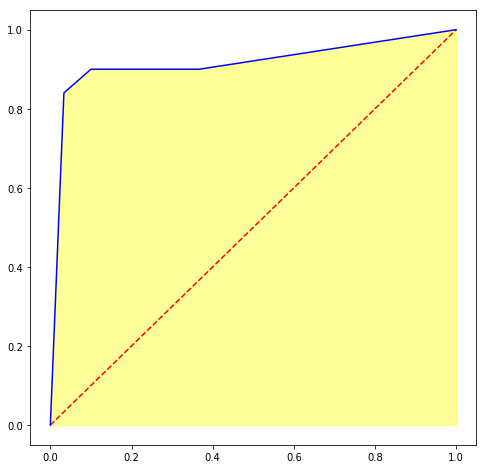

In [86]:
draw_roc(Arbol_Ganador,X_test,y_test)

=========================================================================================================================